In [24]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plot
import numpy as np # álgebra linear
import os # acesso ao diretório
import pandas as pd # processamento dos dados .csv
import math
from starter_pack.func_analysis import plotPerColumnDistribution, plotCorrelationMatrix, plotScatterMatrix

### Vamos verificar 3rd arquivo: /kaggle/input/csv/mass_case_description_train_set.csv

In [25]:
nRowsRead = None # especifique 'None' se quiser ler o arquivo inteiro
# mass_case_description_train_set.csv pode ter mais linhas na realidade, mas estamos carregando/visualizando apenas as primeiras 1000 linhas
df3 = pd.read_csv('/home/rafatokairin/uni-programs/ic/csv/mass_case_description_train_set.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'mass_case_description_train_set.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1318 rows and 14 columns


Vamos dar uma olhada rápida em como os dados se apresentam:

In [26]:
df3.head(5)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [27]:
# dimensões do arquivo
df3.shape

(1318, 14)

In [28]:
# informações do arquivo
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [29]:
df3.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  4
mass margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

Verificar os valores únicos em cada coluna

In [30]:
valores_unicos = []
for i in df3.columns[0:15].tolist():
    print(i, ':', len(df3[i].astype(str).value_counts()))
    valores_unicos.append(len(df3[i].astype(str).value_counts()))

patient_id : 691
breast_density : 4
left or right breast : 2
image view : 2
abnormality id : 6
abnormality type : 1
mass shape : 19
mass margins : 16
assessment : 6
pathology : 3
subtlety : 6
image file path : 1231
cropped image file path : 1318
ROI mask file path : 1318


In [31]:
df3 = df3.drop(columns=['patient_id', 'abnormality id', 'image file path', 'cropped image file path', 'ROI mask file path', 'mass shape', 'mass margins'])

In [32]:
df3.describe()

,breast_density,assessment,subtlety
count,1318.000000,1318.000000,1318.000000
mean,2.203338,3.504552,3.965857
std,0.873774,1.414609,1.102032
min,1.000000,0.000000,0.000000
25%,2.000000,3.000000,3.000000
50%,2.000000,4.000000,4.000000
75%,3.000000,4.000000,5.000000
max,4.000000,5.000000,5.000000


Gráficos de distribuição (histograma/gráfico de barras) das colunas amostradas:

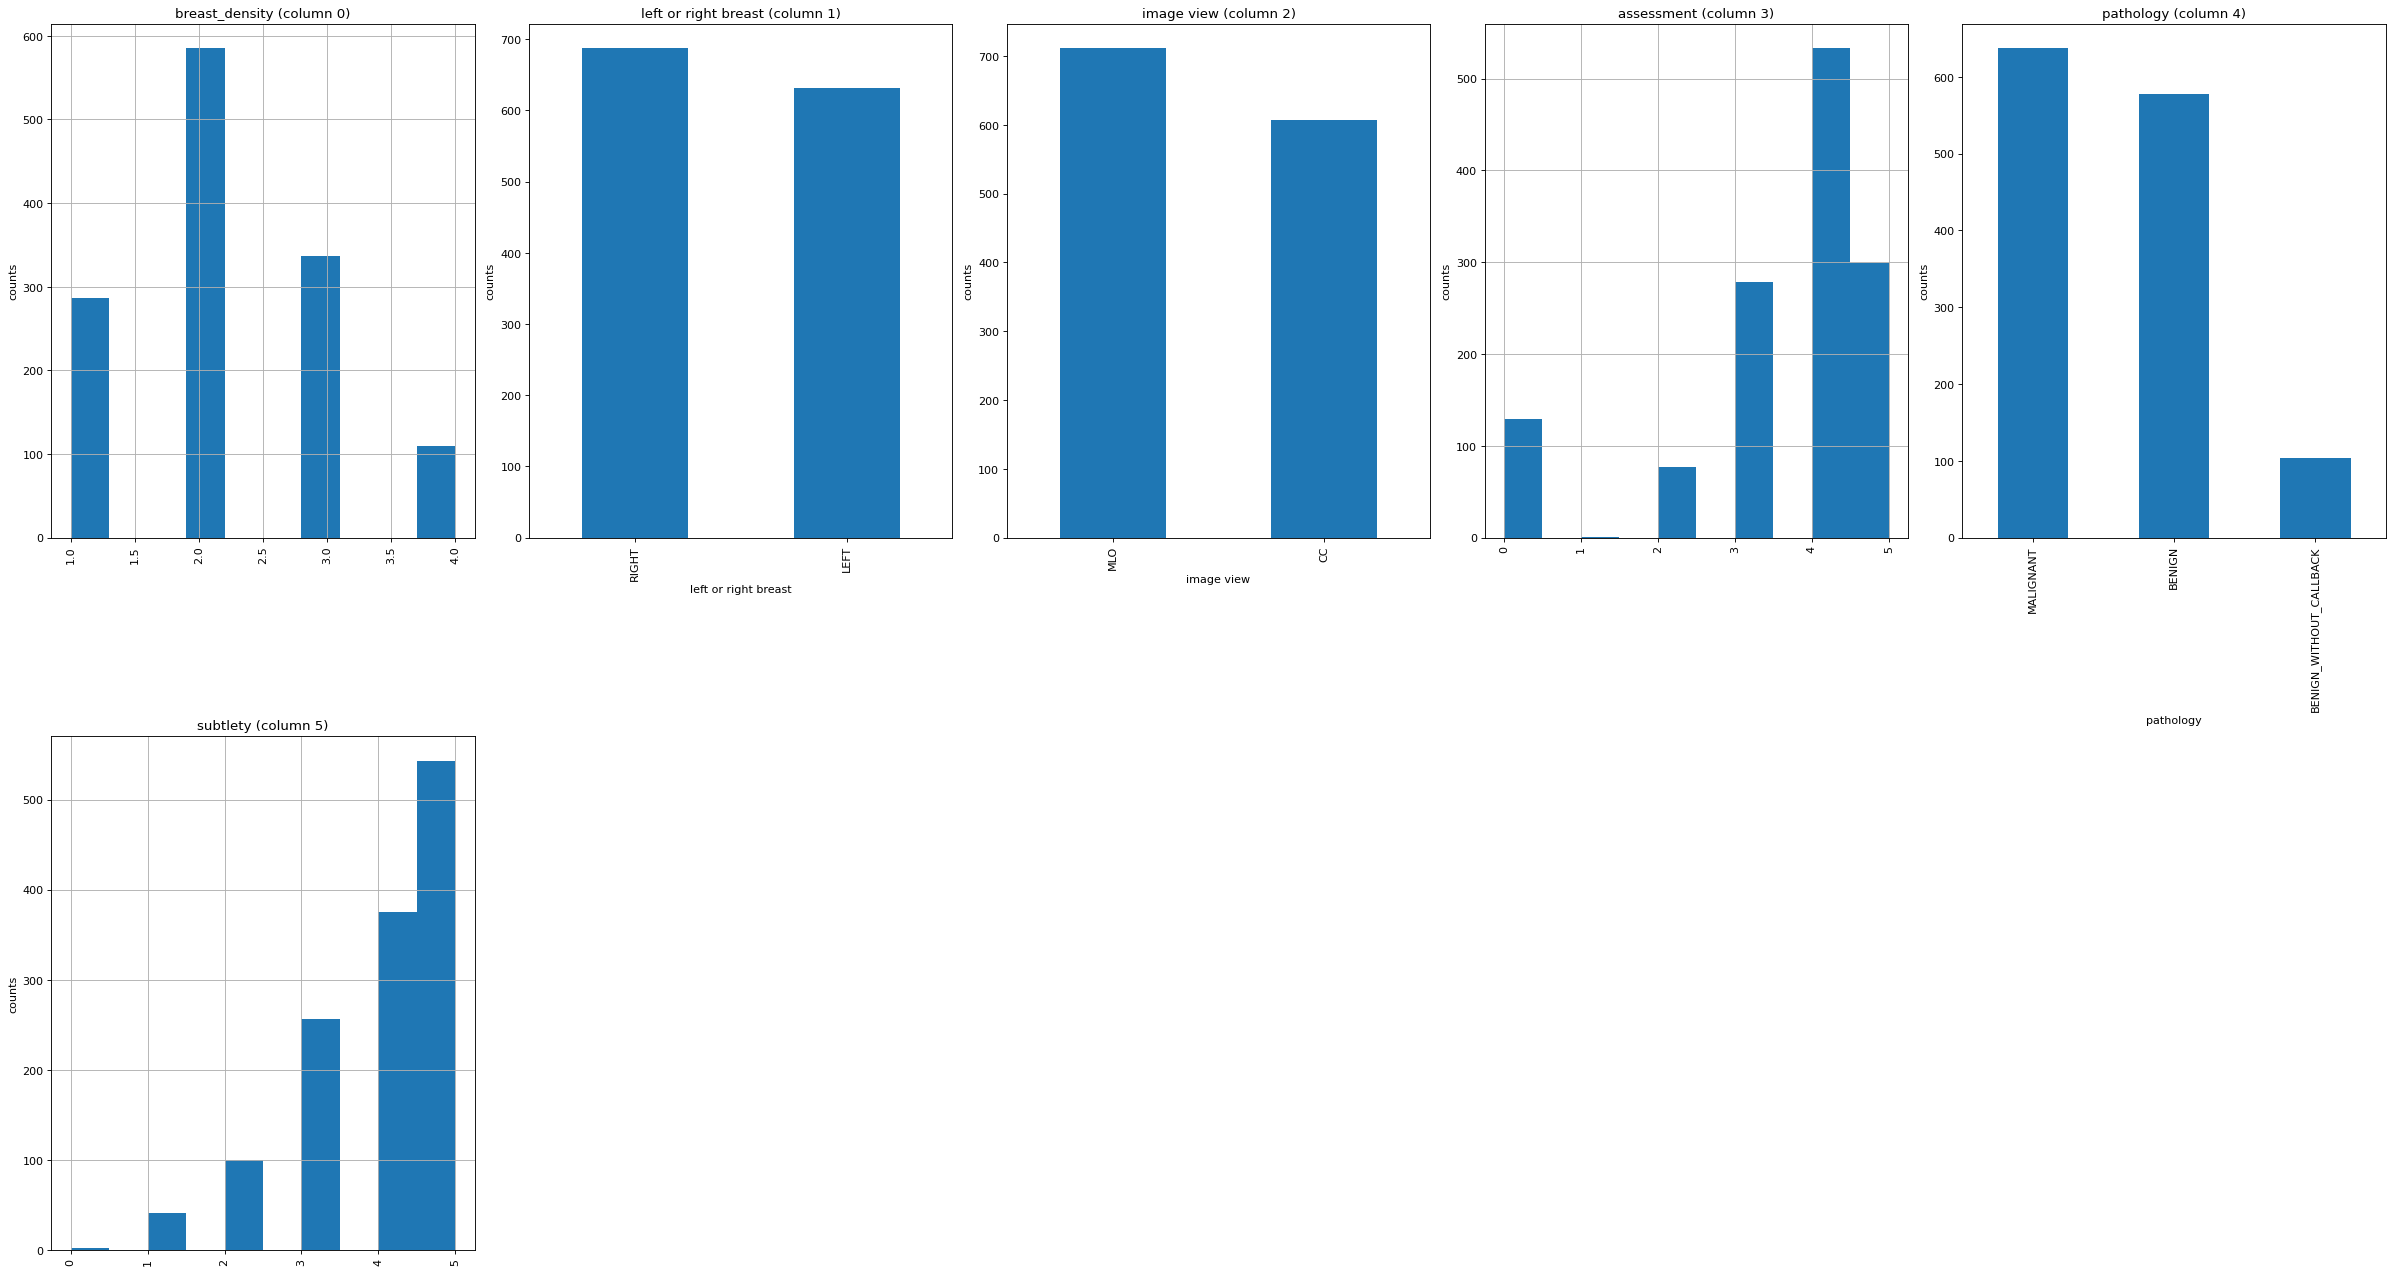

In [33]:
plotPerColumnDistribution(df3, 10, 5)

Matriz de correlação:

<Figure size 640x640 with 0 Axes>

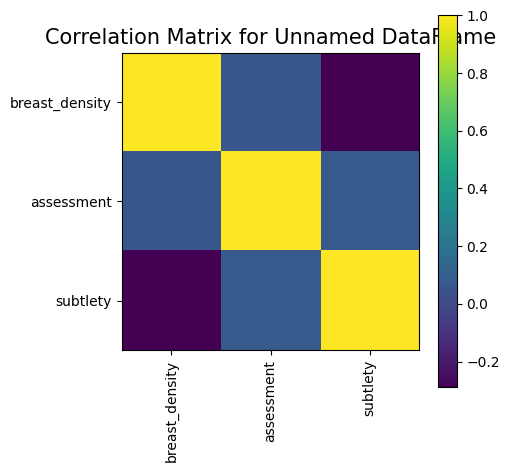

In [34]:
plotCorrelationMatrix(df3, 8)

Gráficos de dispersão e densidade:

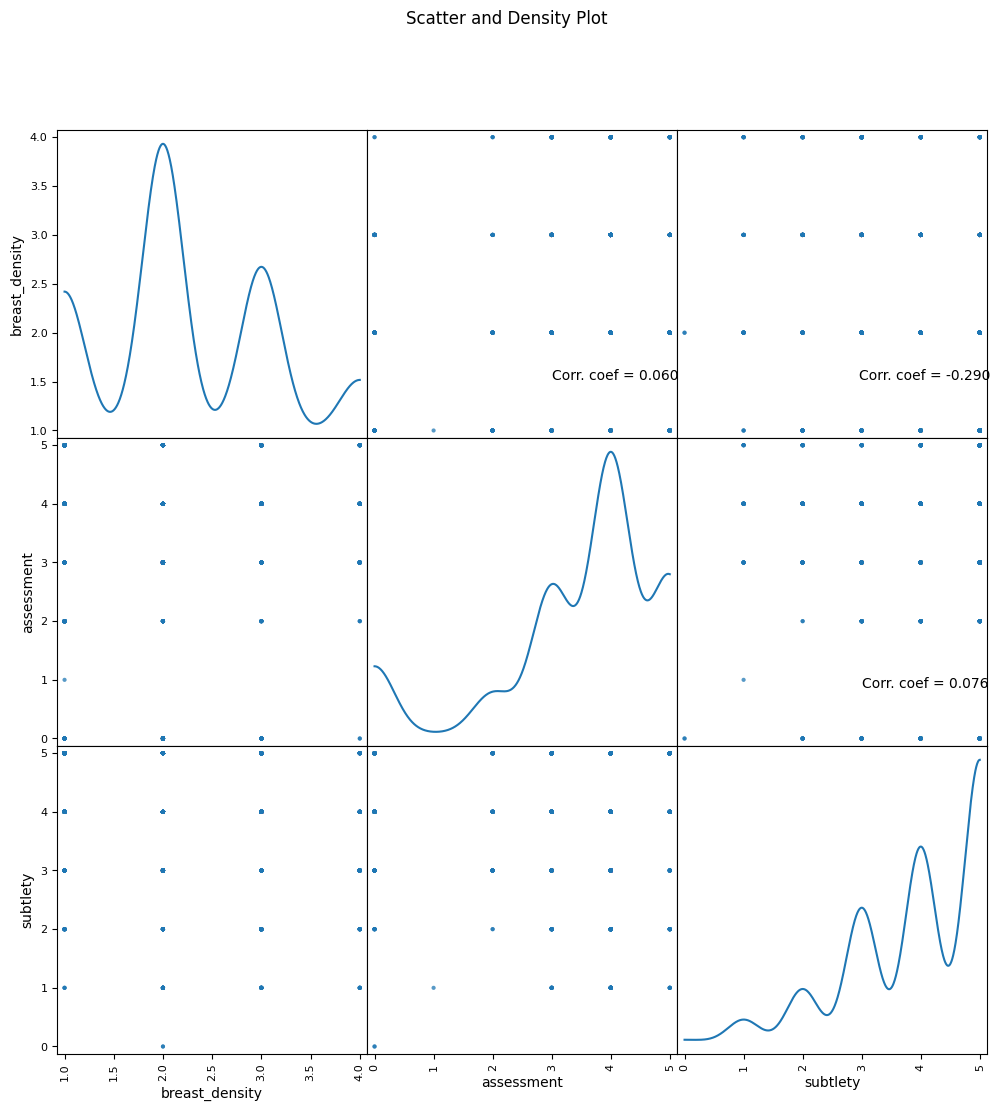

In [35]:
plotScatterMatrix(df3, 12, 10)